In [200]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime
from pdb import set_trace
%matplotlib inline
from gmplot import gmplot
import numpy as np
from matplotlib import style

In [378]:
snp500 = pd.read_csv(r'c:\Users\15764\Documents\Datasets\intraQuarter\YAHOO-INDEX_GSPC.csv')

snp500['Date'] = snp500['Date'].apply(lambda x: x.split('-')[0])
snp500.drop_duplicates(subset='Date',inplace=True)
snp500.set_index('Date',inplace=True)

co2 = pd.read_csv(r'c:\Users\15764\Documents\Datasets\CO2emision\API_EN.ATM.CO2E.KT_DS2_en_csv_v2.csv',skiprows=3,index_col=1)

snp500.sort_index(inplace=True)
co2.drop(['Country Name','Indicator Name','Indicator Code'],axis = 1,inplace=True)
usa = co2.loc['USA']
usa.name = 'CO2 emissions (kt)'

pltdf = pd.concat([snp500,usa],axis=1)
pltdf = pltdf[['Adj Close','CO2 emissions (kt)']]

pltdf = pltdf.iloc[10:-5]

pltdf['Adj Close'] = np.log(pltdf['Adj Close'].values)
pltdf['CO2 emissions (kt)'] = np.log(pltdf['CO2 emissions (kt)'].values)


#usa.index = [ i+str('-01-03') for i in usa.index.tolist()]
pltdf['Adj Close'] = [ (x-pltdf['Adj Close'].min())/(pltdf['Adj Close'].max()-pltdf['Adj Close'].min()) for x in pltdf['Adj Close']]
pltdf['CO2 emissions (kt)'] = [ (x-pltdf['CO2 emissions (kt)'].min())/(pltdf['CO2 emissions (kt)'].max()-pltdf['CO2 emissions (kt)'].min()) for x in pltdf['CO2 emissions (kt)']]
pltdf = pltdf*100

pltdf.rename({'Adj Close':'S&P 500  Inflation Adj. Close (Log scale)','CO2 emissions (kt)':'CO2 emissions (Log scale)'},axis=1,inplace=True)
pltdf.index = np.arange(1960,2014)

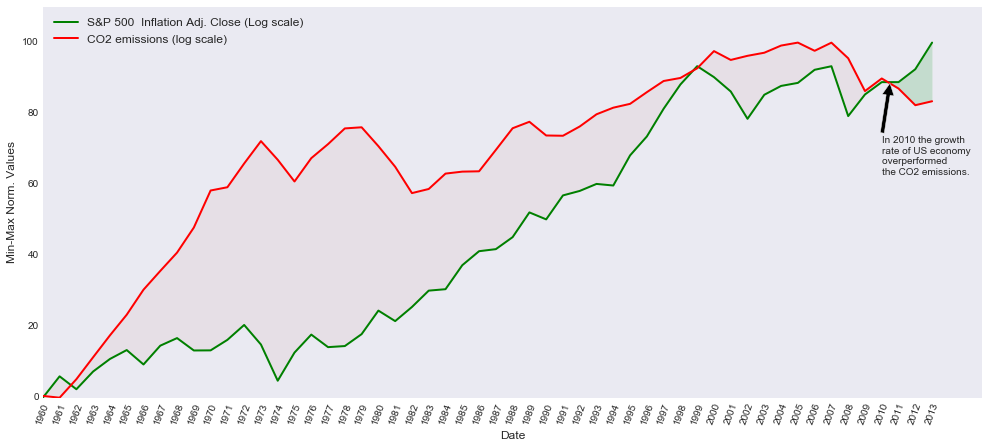

In [391]:
bpdate = 2010
annotation = 'In 2010 the growth \nrate of US economy \noverperformed \nthe CO2 emissions.'
fig, ax = plt.subplots(figsize=(15,7))
style.use("seaborn-dark")
pltdf.plot(ax=ax,color=['g', 'r'])
ax.fill_between(pltdf.loc[:bpdate].index.values, 
                       pltdf.loc[:bpdate].iloc[:,0].values, pltdf.loc[:bpdate].iloc[:,1].values, 
                       facecolor='#D2A5A5',
                       alpha=0.15)

ax.fill_between(pltdf.loc[bpdate:].index.values, 
                       pltdf.loc[bpdate:].iloc[:,0].values, pltdf.loc[bpdate:].iloc[:,1].values, 
                       facecolor='#A5D2B1', 
                       alpha=0.55)

ax.annotate(annotation, xy=(2010.5,88.870134), xytext=(2010,62.870134),
            arrowprops=dict(facecolor='black', shrink=0.02),
            )

ax.set_ylim(0,110)
ax.set_xlim(1960,2016)
ax.set_xlabel("Date")
ax.set_ylabel("Min-Max Norm. Values")
plt.xticks(np.arange(1960,2014), np.arange(1960,2014), rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=70);
